<h1><b><center> Regression Trees </center></b></h1>

- Create a model that can predict the median price of houses for the Boston area.


In [1]:
import requests 
import pandas as pd
import numpy as np

req = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv')

url_content=req.content
file=open('real_estate_data.csv', 'wb')
file.write(url_content)

df= pd.read_csv('real_estate_data.csv')

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [3]:
#What is the size of the data?
df.shape

(506, 13)

In [4]:
#How many missing values?
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

## **Data Preprocessing**

In [5]:
#Drop data with missing values
df.dropna(inplace=True)

## **Creating a Regression Decision Tree**

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [6]:
#MEDV: Median value of owner-occupied homes in $1000s; this is the target variable
X = df.drop(columns=['MEDV'])
Y = df['MEDV']

In [7]:
#Split data into testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1) #20% of data goes to testing set

In [23]:
#Create a DecisionRegressorTree object
regression_tree = DecisionTreeRegressor(max_depth=4, criterion = "squared_error") #criterion:function to measure error

## **Training**

In [24]:
#Train the model
model=regression_tree.fit(X_train, Y_train)

## **Evaluation**

In [25]:
#Evaluate the dataset
#R^2 value, coefficient of determination
print(regression_tree.score(X_test, Y_test))

0.7205804758678533


In [26]:
#Find average error in testing set
prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

$ 3379.8487804323886


## **Visualization**

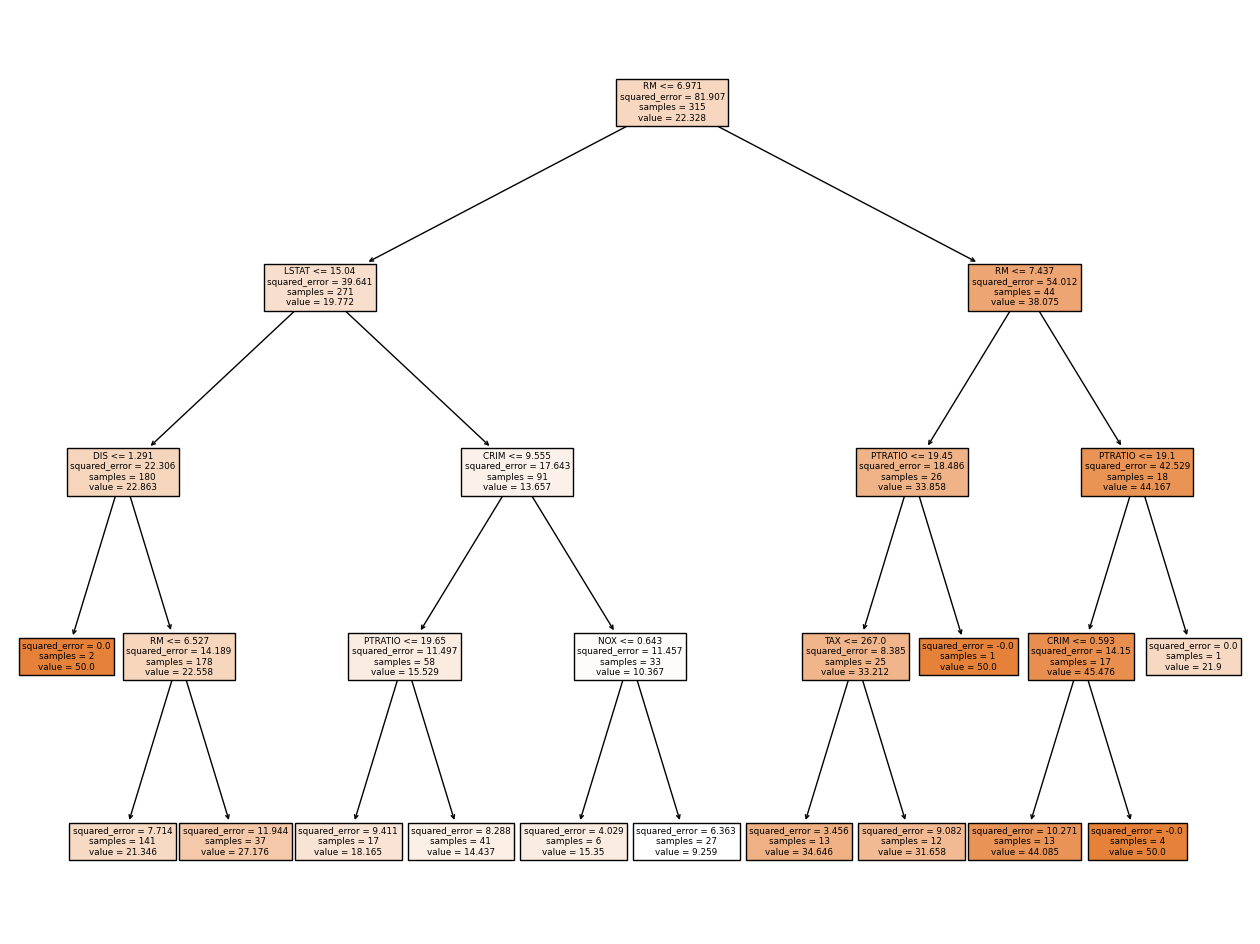

In [32]:
from sklearn import tree
import graphviz
from matplotlib import pyplot as plt

features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
plt.figure(figsize=(16,12)) 
tree.plot_tree(regression_tree, feature_names=features, filled=True)
plt.show()